Assumption 5: Homoscedasticity of Error Terms

Residuals should have relatively constant variance


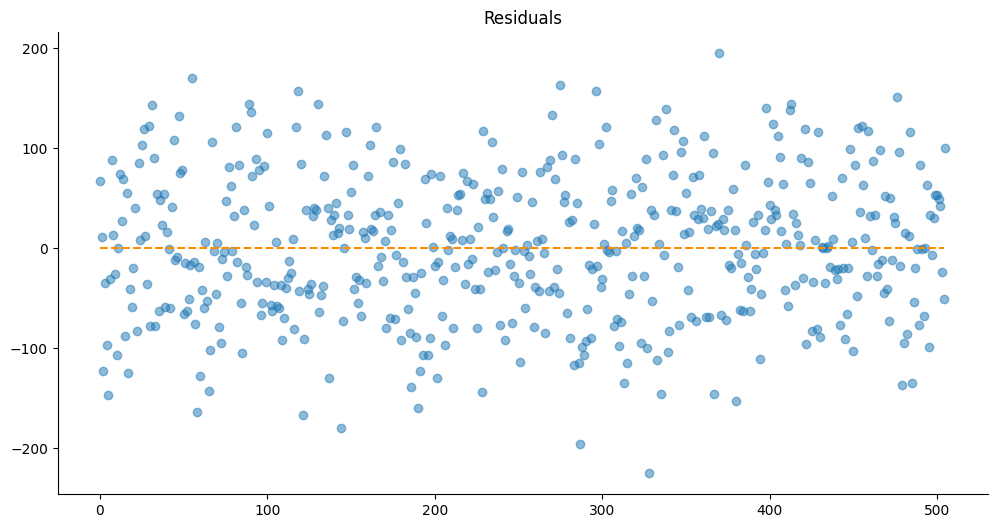

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate artificial linear data
linear_X, linear_y = make_regression(n_samples=506, n_features=13, noise=75, random_state=46)

# Set feature names for the dataset
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(linear_X, linear_y)

# Residual calculation function
def calculate_residuals(model, features, label):
    """
    Calculate residuals between the observed target values and the model's predictions.
    """
    predictions = model.predict(features)
    residuals = label - predictions
    return pd.DataFrame({'Residuals': residuals})

# Function to check for homoscedasticity
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance.
    """
    print('Assumption 5: Homoscedasticity of Error Terms\n')
    
    print('Residuals should have relatively constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

# Call the homoscedasticity function for the linear model
homoscedasticity_assumption(linear_model, linear_X, linear_y)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15268\1672350577.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  boston = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)


Assumption 5: Homoscedasticity of Error Terms

Residuals should have relatively constant variance


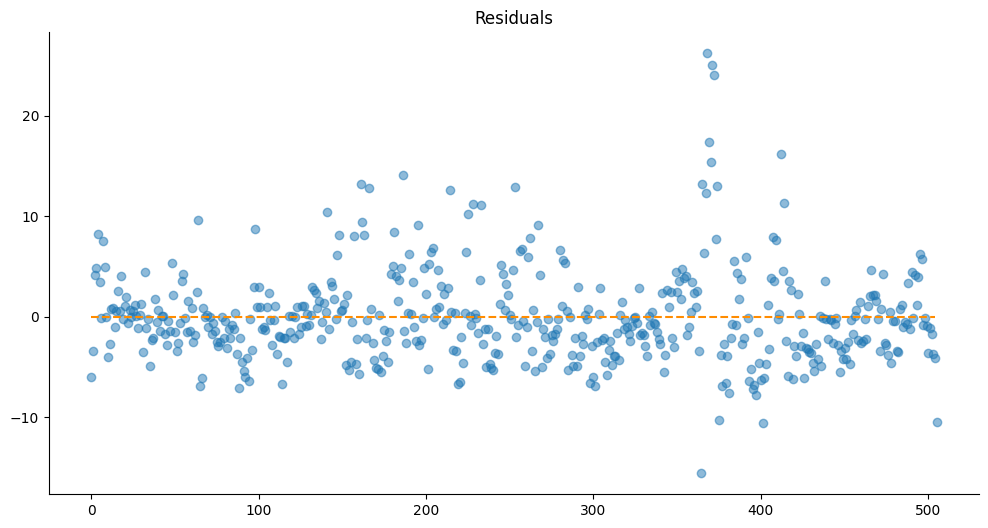

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson

# Load Boston housing dataset from a CSV file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
    'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
boston = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

# Separate features and target
boston_data = boston.drop('MEDV', axis=1)
boston_target = boston['MEDV']

# Fit a linear regression model
boston_model = LinearRegression()
boston_model.fit(boston_data, boston_target)

# Residual calculation function
def calculate_residuals(model, features, label):
    """
    Calculate residuals between the observed target values and the model's predictions.
    """
    predictions = model.predict(features)
    residuals = label - predictions
    return pd.DataFrame({'Residuals': residuals})

# Function to check for homoscedasticity
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance.
    """
    print('Assumption 5: Homoscedasticity of Error Terms\n')
    
    print('Residuals should have relatively constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

# Call the homoscedasticity function for the Boston dataset
homoscedasticity_assumption(boston_model, boston_data, boston_target)
